<a href="https://colab.research.google.com/github/sushrutha777/Horse-Human-Classifcation/blob/main/horse_human_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sushruthaskottary","key":"b290d11a2d7de47f1fea080dc807a42b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle -q

In [4]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset -p /content/horses_or_humans

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
 95% 291M/307M [00:00<00:00, 441MB/s]
100% 307M/307M [00:00<00:00, 477MB/s]


In [5]:
!unzip -q /content/horses_or_humans/horses-or-humans-dataset.zip -d /content/horses_or_humans/raw

In [6]:
import shutil, os

base_path = "/content/horses_or_humans/raw/horse-or-human/horse-or-human"
target_path = "/content/horses_or_humans"

# Move train & validation folders to target_path
shutil.move(os.path.join(base_path, "train"), os.path.join(target_path, "train"))
shutil.move(os.path.join(base_path, "validation"), os.path.join(target_path, "validation"))

# Remove the extra raw folder
shutil.rmtree("/content/horses_or_humans/raw")

print("✅ Dataset is ready!")
print("Train classes:", os.listdir(os.path.join(target_path, "train")))
print("Validation classes:", os.listdir(os.path.join(target_path, "validation")))


✅ Dataset is ready!
Train classes: ['humans', 'horses']
Validation classes: ['humans', 'horses']


In [7]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

In [8]:
TRAIN_DIR = 'horses_or_humans/train'
VAL_DIR = 'horses_or_humans/validation'

# Directory with training horse pictures
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')

# Directory with training human pictures
train_human_dir = os.path.join(TRAIN_DIR, 'humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join(VAL_DIR, 'horses')

# Directory with validation human pictures
validation_human_dir = os.path.join(VAL_DIR, 'humans')

In [9]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse09-6.png', 'horse25-9.png', 'horse33-5.png', 'horse35-1.png', 'horse20-4.png', 'horse49-6.png', 'horse48-9.png', 'horse47-5.png', 'horse46-3.png', 'horse40-4.png']
TRAIN SET HUMANS: ['human08-29.png', 'human01-07.png', 'human13-13.png', 'human17-03.png', 'human15-18.png', 'human14-21.png', 'human02-02.png', 'human06-05.png', 'human03-02.png', 'human10-20.png']
VAL SET HORSES: ['horse3-217.png', 'horse2-269.png', 'horse4-000.png', 'horse1-127.png', 'horse6-161.png', 'horse2-314.png', 'horse5-181.png', 'horse4-043.png', 'horse4-541.png', 'horse1-224.png']
VAL SET HUMANS: ['valhuman05-23.png', 'valhuman03-03.png', 'valhuman03-24.png', 'valhuman05-18.png', 'valhuman01-09.png', 'valhuman02-11.png', 'valhuman02-05.png', 'valhuman02-16.png', 'valhuman04-19.png', 'valhuman04-16.png']


In [53]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [54]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [57]:
# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
    )

# Instantiate the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
    )

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [58]:
# Define the rescaling layer
rescale_layer = tf.keras.layers.Rescaling(1./255)

# Rescale both datasets
train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

# Configure the training set
train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

# Configure the validation dataset
validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                           )

In [59]:
history = model.fit(
      train_dataset_final,
      epochs=10,
      validation_data = validation_dataset_final,
      verbose=2)

Epoch 1/10
33/33 - 8s - 240ms/step - accuracy: 0.5920 - loss: 0.8930 - val_accuracy: 0.6094 - val_loss: 0.5949
Epoch 2/10
33/33 - 1s - 16ms/step - accuracy: 0.8637 - loss: 0.3235 - val_accuracy: 0.8711 - val_loss: 0.5120
Epoch 3/10
33/33 - 0s - 14ms/step - accuracy: 0.9270 - loss: 0.1778 - val_accuracy: 0.8672 - val_loss: 0.7272
Epoch 4/10
33/33 - 0s - 14ms/step - accuracy: 0.9679 - loss: 0.0754 - val_accuracy: 0.8359 - val_loss: 0.9557
Epoch 5/10
33/33 - 1s - 18ms/step - accuracy: 0.9649 - loss: 0.0895 - val_accuracy: 0.8711 - val_loss: 1.0634
Epoch 6/10
33/33 - 0s - 13ms/step - accuracy: 0.9747 - loss: 0.0869 - val_accuracy: 0.8828 - val_loss: 0.5883
Epoch 7/10
33/33 - 0s - 14ms/step - accuracy: 0.9766 - loss: 0.0812 - val_accuracy: 0.8477 - val_loss: 1.3998
Epoch 8/10
33/33 - 0s - 13ms/step - accuracy: 0.9961 - loss: 0.0207 - val_accuracy: 0.8398 - val_loss: 1.5274
Epoch 9/10
33/33 - 0s - 13ms/step - accuracy: 0.9796 - loss: 0.2013 - val_accuracy: 0.8828 - val_loss: 0.6728
Epoch 10/

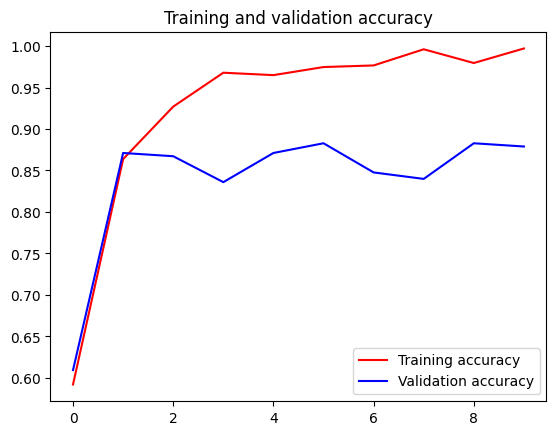

In [60]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

## By Above Line Chart We can say that the model is overfitted

In [63]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    for filename, file_info in change.new.items():
        file_jpgdata = BytesIO(file_info['content'])
        file_predict(filename, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

/tmp/ipython-input-1718549843.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipython-input-1718549843.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


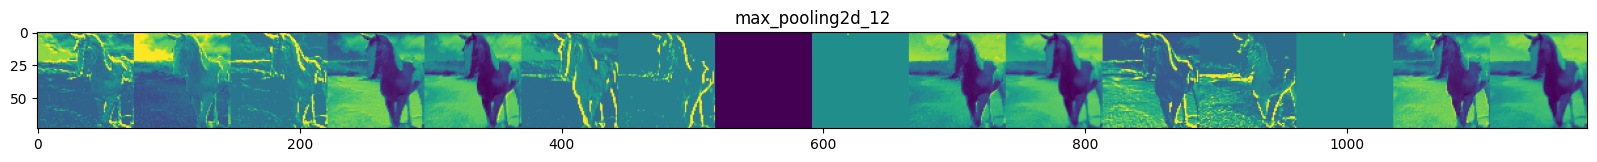

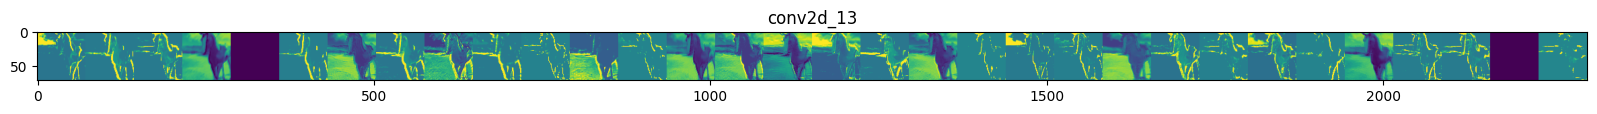

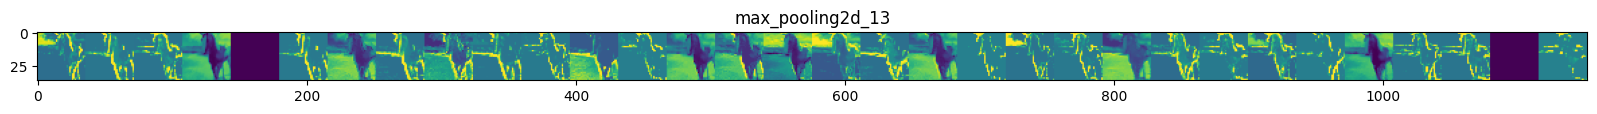

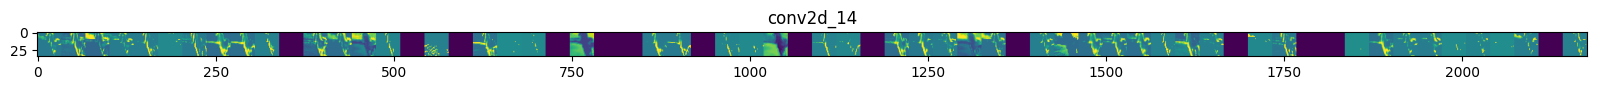

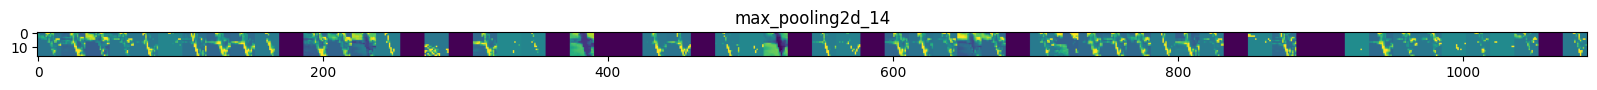

In [64]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
# Since you are not using a tf.data.Dataset you apply the normalization via a simple numpy vectorization
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')